<a href="https://colab.research.google.com/github/pvh95/Temalabor2/blob/main/bootstrap_on_bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import files
from google.colab import drive  
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [100]:
import numpy as np 
import pandas as pd
import random 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [101]:
df = pd.read_csv('/content/gdrive/MyDrive/Dissertation_CEU_BME/balance2018.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
df = df[df['sales_clean'] != 0]
df = df[['sales_clean', 'tanass_clean', 'tax']]

In [103]:
len(df)

332643

In [104]:
df = df.dropna(subset=['tanass_clean', 'tax'])

In [105]:
len(df)

332604

In [106]:
print('summmary stats for the sales_clean')
sum_stat = df['sales_clean'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the sales_clean
count        332604.000
mean         314854.888
std         8137357.078
min               0.537
25%            4642.000
50%           18034.500
75%           70810.250
max      2371623338.000
Name: sales_clean, dtype: object


In [107]:
print('summmary stats for the tanass_clean')
sum_stat = df['tanass_clean'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the tanass_clean
count        332604.000
mean         135862.025
std        11129327.382
min               0.000
25%              70.000
50%            1695.000
75%           13675.250
max      6094569000.000
Name: tanass_clean, dtype: object


In [108]:
print('summmary stats for the tax')
sum_stat = df['tax'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the tax
count      332604.000
mean         1969.049
std        118160.019
min             0.000
25%            18.000
50%           114.000
75%           576.000
max      63639000.000
Name: tax, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


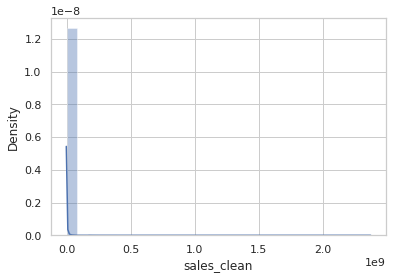

In [109]:
sns.distplot(df["sales_clean"], bins = 30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


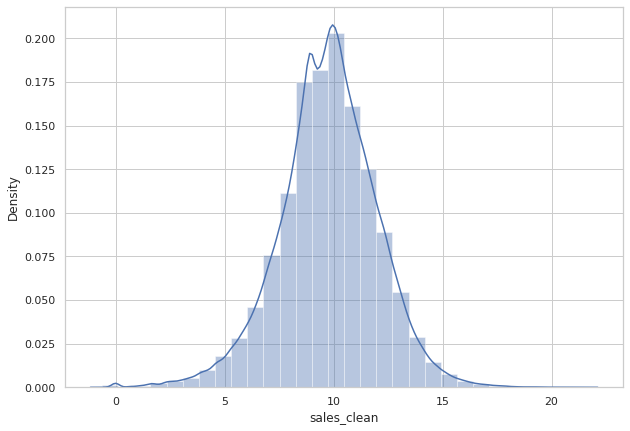

In [110]:
logSales = np.log(df["sales_clean"])
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.distplot(logSales, bins = 30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


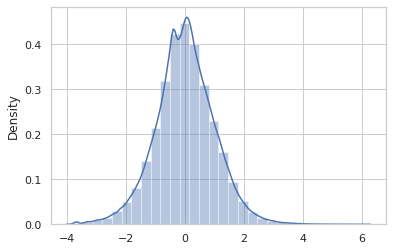

In [111]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
trialdf = pd.DataFrame(df, columns= ["sales_clean"])
pt = preprocessing.PowerTransformer(method='yeo-johnson')
modified_sales = pt.fit_transform(trialdf)
sns.distplot(modified_sales, bins = 30) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


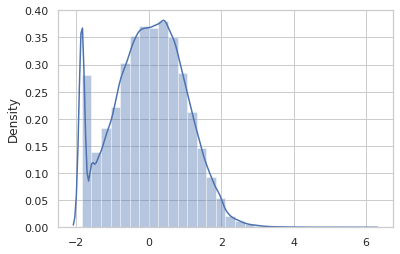

In [112]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
trialdf = pd.DataFrame(df, columns= ["tax"])
pt = preprocessing.PowerTransformer(method='yeo-johnson')
modified_tax = pt.fit_transform(trialdf)
sns.distplot(modified_tax, bins = 30) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


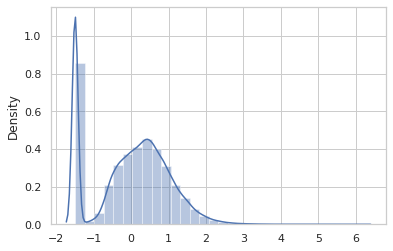

In [113]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
trialdf = pd.DataFrame(df, columns= ["tanass_clean"])
pt = preprocessing.PowerTransformer(method='yeo-johnson')
modified_tanass = pt.fit_transform(trialdf)
sns.distplot(modified_tanass, bins = 30) 

In [114]:
pt = preprocessing.PowerTransformer(method='yeo-johnson')
array_normed = pt.fit_transform(df)
df_normed = pd.DataFrame(array_normed, columns = df.columns, index = df.index)

In [115]:
array_normed

array([[ 1.29226826,  1.35158472,  1.81267444],
       [ 4.58215979,  3.66771009,  4.60482363],
       [ 3.37312287,  4.29062238,  2.89718024],
       ...,
       [-0.83608459, -0.85244298, -0.84549429],
       [-1.07025499, -1.49173315,  0.28218889],
       [ 0.49840565,  0.83481302, -0.02455371]])

In [116]:
df_normed

,sales_clean,tanass_clean,tax
0,1.292268,1.351585,1.812674
1,4.582160,3.667710,4.604824
2,3.373123,4.290622,2.897180
3,-1.440657,2.277608,-1.846307
4,0.488393,0.872971,1.768322
...,...,...,...
420013,0.165346,0.185727,-0.257573
420014,0.054051,-0.135997,0.061400
420015,-0.836085,-0.852443,-0.845494
420016,-1.070255,-1.491733,0.282189


# Population

In [117]:
print('summmary stats for the normed sales_clean')
sum_stat = df_normed['sales_clean'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the normed sales_clean
count    332604.000
mean         -0.000
std           1.000
min          -3.799
25%          -0.604
50%          -0.003
75%           0.622
max           6.070
Name: sales_clean, dtype: object


In [118]:
print('summmary stats for the normed tanass_clean')
sum_stat = df_normed['tanass_clean'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the normed tanass_clean
count    332604.000
mean         -0.000
std           1.000
min          -1.492
25%          -0.643
50%           0.124
75%           0.703
max           6.158
Name: tanass_clean, dtype: object


In [119]:
print('summmary stats for the normed tax')
sum_stat = df_normed['tax'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the normed tax
count    332604.000
mean         -0.000
std           1.000
min          -1.846
25%          -0.694
50%           0.037
75%           0.710
max           6.082
Name: tax, dtype: object


In [120]:
X = sm.add_constant(df_normed.iloc[:,1:], prepend = True)
ols_model = sm.OLS(df_normed['sales_clean'], X)
ols_results = ols_model.fit()

In [121]:
ols_results.params

const          -2.320193e-17
tanass_clean    3.324291e-01
tax             5.653771e-01
dtype: float64

In [122]:
ols_results.rsquared

0.5691217992587185

In [123]:
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_clean   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 2.197e+05
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:43:32   Log-Likelihood:            -3.3193e+05
No. Observations:              332604   AIC:                         6.639e+05
Df Residuals:                  332601   BIC:                         6.639e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -2.32e-17      0.001  -2.04e-14   

In [124]:
df_normed.corr()

,sales_clean,tanass_clean,tax
sales_clean,1.000000,0.541438,0.688270
tanass_clean,0.541438,1.000000,0.369681
tax,0.688270,0.369681,1.000000


In [125]:
df_normed['sales_clean'].corr(df_normed['tanass_clean'])

0.5414382274710408

# Bootstrapping


In [126]:
from collections import defaultdict
my_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(dict))))

In [148]:
sample_size_lst = [50, 100, 200, 500, 1000, 2000, 3500, 5000, 6500, 8000, 10000]

In [149]:
def create_empty_df(column_names):
    df = pd.DataFrame(columns = column_names)
    
    return df 

In [150]:
### New 

encompassing_df = None
bts_resamp = 10000

for ss in sample_size_lst:

    sample_mean_sales = []
    sample_std_sales = [] 
    sample_median_sales = []

    sample_corr_sales_tanass = []
    sample_corr_sales_tax = []
    sample_corr_tanass_tax = []

    sample_ols_tanass = [] 
    sample_ols_tax = []
    sample_ols_r2 = []
 
    sample_from_pop = df_normed.sample(n=ss, replace=False, random_state=42)

    xbar_sales = np.mean(sample_from_pop['sales_clean'])
    std_sales = np.std(sample_from_pop['sales_clean'])
    med_sales = np.median(sample_from_pop['sales_clean']) 

    corr_sales_tanass = sample_from_pop['sales_clean'].corr(sample_from_pop['tanass_clean'])
    corr_sales_tax = sample_from_pop['sales_clean'].corr(sample_from_pop['tax'])
    corr_tanass_tax = sample_from_pop['tanass_clean'].corr(sample_from_pop['tax'])

    X = sm.add_constant(sample_from_pop.iloc[:,1:], prepend = True)
    ols_results = sm.OLS(sample_from_pop['sales_clean'], X).fit()

    ols_tanass = ols_results.params[1]
    ols_tax = ols_results.params[2]
    ols_r2 = ols_results.rsquared


    for _ in range(bts_resamp):
        resample_df = sample_from_pop.sample(n=ss, replace=True)

        sample_mean_sales.append(np.mean(resample_df['sales_clean']))
        sample_std_sales.append(np.std(resample_df['sales_clean']))
        sample_median_sales.append(np.median(resample_df['sales_clean']))

        sample_corr_sales_tanass.append(resample_df['sales_clean'].corr(resample_df['tanass_clean']))
        sample_corr_sales_tax.append(resample_df['sales_clean'].corr(resample_df['tax']))
        sample_corr_tanass_tax.append(resample_df['tanass_clean'].corr(resample_df['tax']))


        X_resample = sm.add_constant(resample_df.iloc[:,1:], prepend = True)
        ols_results_resample = sm.OLS(resample_df['sales_clean'], X_resample).fit()

        sample_ols_tanass.append(ols_results_resample.params[1])
        sample_ols_tax.append(ols_results_resample.params[2])
        sample_ols_r2.append(ols_results_resample.rsquared)

    ### Converting lists to arrays
    sample_mean_sales = np.asarray(sample_mean_sales)
    sample_std_sales = np.asarray(sample_std_sales)
    sample_median_sales = np.asarray(sample_median_sales)

    sample_corr_sales_tanass = np.asarray(sample_corr_sales_tanass)
    sample_corr_sales_tax = np.asarray(sample_corr_sales_tax)
    sample_corr_tanass_tax = np.asarray(sample_corr_tanass_tax)

    sample_ols_tanass = np.asarray(sample_ols_tanass)
    sample_ols_tax = np.asarray(sample_ols_tax)
    sample_ols_r2 = np.asarray(sample_ols_r2)


    bs_df = create_empty_df(['Sample_Size', 'Sample_Facts', 'Statistics/Estimator', 'Mean', '0.025', '0.975', 'Bias', 'SE', 'RMSE'])

    bs_df['Sample_Size'] = [ss for i in range(9)]
    bs_df['Sample_Facts'] = [xbar_sales, std_sales, med_sales, 
                             corr_sales_tanass, corr_sales_tax, corr_tanass_tax, 
                             ols_tanass, ols_tax, ols_r2]

    bs_df['Statistics/Estimator'] = ['xbar_sales', 'std_sales', 'med_sales', 
                                     'corr_sales_tanass', 'corr_sales_tax', 'corr_tanass_tax', 
                                     'ols_tanass', 'ols_tax', 'ols_r2']

    bs_df['Mean'] = [np.mean(sample_mean_sales), np.mean(sample_std_sales), np.mean(sample_median_sales),
                     np.mean(sample_corr_sales_tanass), np.mean(sample_corr_sales_tax), np.mean(sample_corr_tanass_tax),
                     np.mean(sample_ols_tanass), np.mean(sample_ols_tax), np.mean(sample_ols_r2)]

    bs_df['0.025'] = [np.percentile(sample_mean_sales, 2.5), np.percentile(sample_std_sales, 2.5), np.percentile(sample_median_sales, 2.5),
                      np.percentile(sample_corr_sales_tanass, 2.5), np.percentile(sample_corr_sales_tax, 2.5), np.percentile(sample_corr_tanass_tax, 2.5),
                      np.percentile(sample_ols_tanass, 2.5), np.percentile(sample_ols_tax, 2.5), np.percentile(sample_ols_r2, 2.5)]

    bs_df['0.975'] = [np.percentile(sample_mean_sales, 97.5), np.percentile(sample_std_sales, 97.5), np.percentile(sample_median_sales, 97.5),
                      np.percentile(sample_corr_sales_tanass, 97.5), np.percentile(sample_corr_sales_tax, 97.5), np.percentile(sample_corr_tanass_tax, 97.5),
                      np.percentile(sample_ols_tanass, 97.5), np.percentile(sample_ols_tax, 97.5), np.percentile(sample_ols_r2, 97.5)]
    

    bs_df['Bias'] = [np.abs(xbar_sales-np.mean(sample_mean_sales)), np.abs(std_sales-np.mean(sample_std_sales)), np.abs(med_sales-np.mean(sample_median_sales)),
                     np.abs(corr_sales_tanass-np.mean(sample_corr_sales_tanass)), np.abs(corr_sales_tax-np.mean(sample_corr_sales_tax)), np.abs(corr_tanass_tax-np.mean(sample_corr_tanass_tax)),
                     np.abs(ols_tanass-np.mean(sample_ols_tanass)), np.abs(ols_tax-np.mean(sample_ols_tax)), np.abs(ols_r2-np.mean(sample_ols_r2))]

    bs_df['SE'] = [np.std(sample_mean_sales), np.std(sample_std_sales), np.std(sample_median_sales),
                   np.std(sample_corr_sales_tanass), np.std(sample_corr_sales_tax), np.std(sample_corr_tanass_tax),
                   np.std(sample_ols_tanass), np.std(sample_ols_tax), np.std(sample_ols_r2)]

    bs_df['RMSE'] = [np.sqrt(np.mean((xbar_sales-sample_mean_sales)**2)), np.sqrt(np.mean((std_sales-sample_std_sales)**2)), np.sqrt(np.mean((med_sales-sample_median_sales)**2)),
                     np.sqrt(np.mean((corr_sales_tanass-sample_corr_sales_tanass)**2)), np.sqrt(np.mean((corr_sales_tax-sample_corr_sales_tax)**2)), np.sqrt(np.mean((corr_tanass_tax-sample_corr_tanass_tax)**2)),
                     np.sqrt(np.mean((ols_tanass-sample_ols_tanass)**2)), np.sqrt(np.mean((ols_tax-sample_ols_tax)**2)), np.sqrt(np.mean((ols_r2-sample_ols_r2)**2))] 

    encompassing_df = pd.concat([encompassing_df, bs_df])   


encompassing_df = encompassing_df.reset_index(drop = True)


In [168]:
encompassing_df[encompassing_df['Statistics/Estimator'] == 'med_sales']

,Sample_Size,Sample_Facts,Statistics/Estimator,Mean,0.025,0.975,Bias,SE,RMSE
2,50,0.002977,med_sales,-0.073403,-0.423388,0.212843,0.076380,0.181893,0.197279
11,100,-0.074903,med_sales,-0.110353,-0.391682,0.156322,0.035450,0.177698,0.181199
20,200,0.016010,med_sales,-0.005764,-0.170904,0.118317,0.021774,0.079492,0.082420
29,500,-0.114592,med_sales,-0.095447,-0.189996,0.049782,0.019145,0.064811,0.067580
38,1000,-0.062767,med_sales,-0.064924,-0.144268,0.029932,0.002157,0.047349,0.047398
47,2000,-0.043599,med_sales,-0.045992,-0.106920,0.010119,0.002392,0.029331,0.029429
56,3500,0.007372,med_sales,0.007075,-0.031926,0.040809,0.000298,0.017971,0.017973
65,5000,0.012935,med_sales,0.012937,-0.020569,0.040617,0.000003,0.015420,0.015420
74,6500,0.015744,med_sales,0.015277,-0.010689,0.040085,0.000467,0.013324,0.013333
83,8000,0.005125,med_sales,0.004157,-0.021996,0.029250,0.000968,0.012823,0.012860


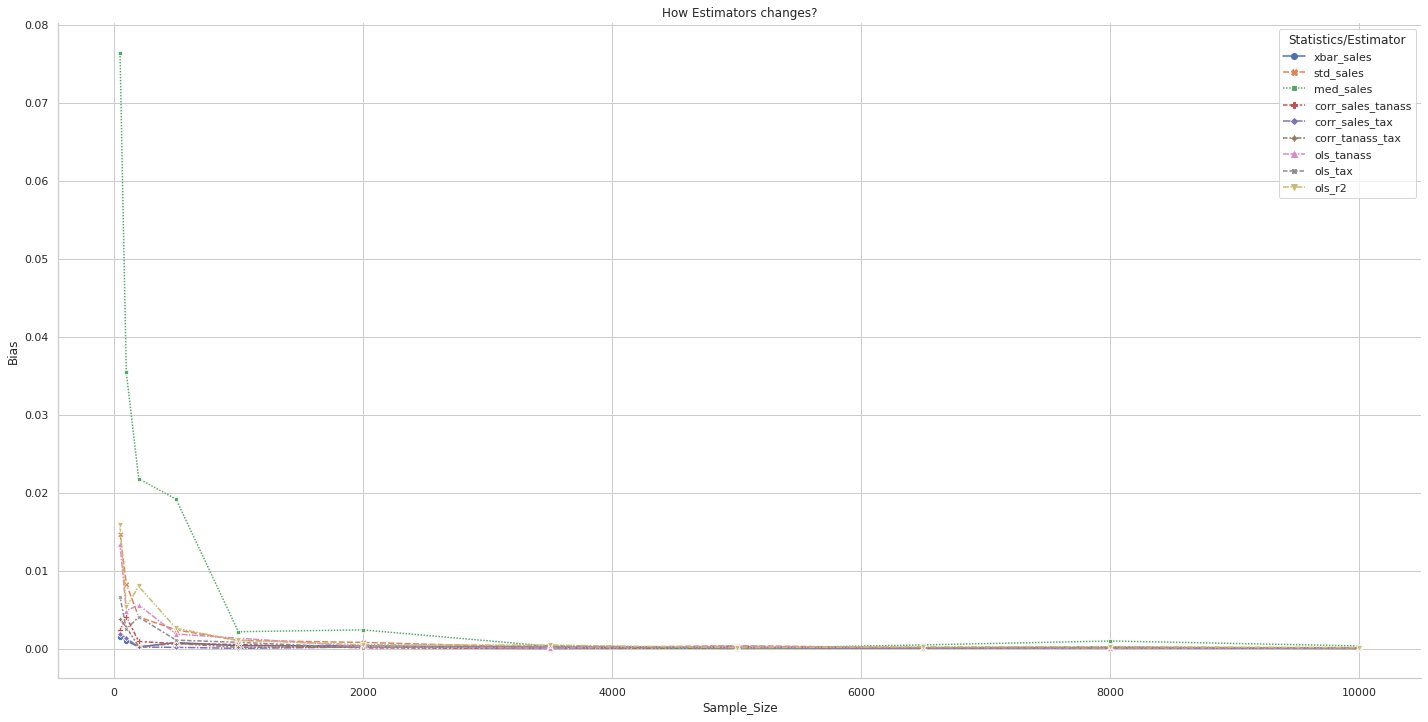

In [167]:
g = sns.relplot(x="Sample_Size", y="Bias", hue = 'Statistics/Estimator', style = 'Statistics/Estimator', 
            #palette = ['red','green','blue','black' ],  
            kind="line",  facet_kws={'legend_out': False}, 
            data=encompassing_df, markers=True, height = 10, aspect = 2).set(title = 'How Estimators changes?')

leg = g.axes.flat[0].get_legend()
new_title = 'Statistics/Estimator'
leg.set_title(new_title)
new_labels = list(bs_df['Statistics/Estimator'])
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)

In [169]:
np.mean(sample_mean_sales)

-0.0017072525601443892

(array([   4.,   19.,  193.,  881., 2157., 3115., 2380.,  997.,  228.,
          26.]),
 array([0.52762021, 0.53453323, 0.54144626, 0.54835928, 0.5552723 ,
        0.56218533, 0.56909835, 0.57601137, 0.5829244 , 0.58983742,
        0.59675045]),
 <a list of 10 Patch objects>)

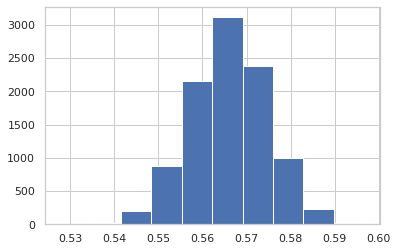

In [170]:
plt.hist(sample_r2)

(array([   7.,   56.,  274.,  784., 2284., 2243., 2746., 1231.,  327.,
          48.]),
 array([-0.04034077, -0.0320854 , -0.02383003, -0.01557466, -0.00731929,
         0.00093608,  0.00919145,  0.01744683,  0.0257022 ,  0.03395757,
         0.04221294]),
 <a list of 10 Patch objects>)

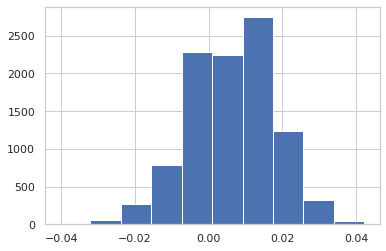

In [171]:
plt.hist(sample_median_sales)

In [172]:
np.mean(sample_mean_sales)

-0.0017072525601443892

In [173]:
np.mean(ols_r2)

0.5658878849432876